<a href="https://colab.research.google.com/github/NyamasegeJoshua/Joshua-Maeba-Nyamasege/blob/main/Survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##                **PROJECT**
 BUILDING A MODEL TO PREDICT CHANCES OF SURVIVAL FOR PASSENGERS UPON TITANIC SHIP
 
*Joshu Maeba*

In [62]:
# import the required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as pyplot
import seaborn as sns
% matplotlib inline

In [24]:
# Importing the dataset
titanic = pd.read_csv("/content/train.csv")
# view the head of the data
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Get shape of the dataset
titanic.shape

(891, 12)

In [ ]:
# Get basic info about the dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


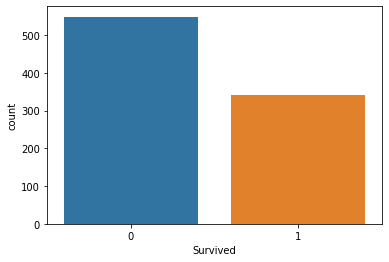

In [ ]:
# visualize the number of people who survived
sns.countplot(x = "Survived", data = titanic) ## '0 - didn't survive, 1- survived'

## We see that over 500 people did not survive and about 300 people survived the accident

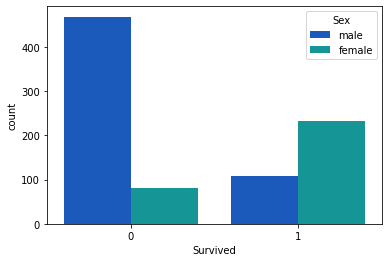

In [ ]:
# Visualizing  Survival in terms of gender
sns.countplot(x = "Survived", hue = "Sex", data = titanic, palette = "winter")

From the  visual it's clear that a large number of males did not survive and also the proportion of females who survived is bigger than that of males

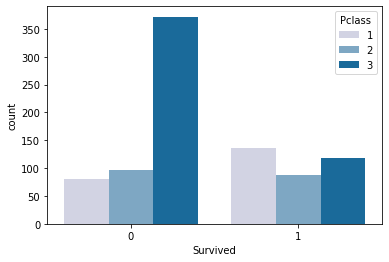

In [ ]:
# Checking passenger survival in terms of passenger class
sns.countplot(x = "Survived", hue = "Pclass", data = titanic, palette = "PuBu")

From the above visualization, it's eevident that many of the passengers in the Third class did not survive. Also most of the passengers that survived were from the First class

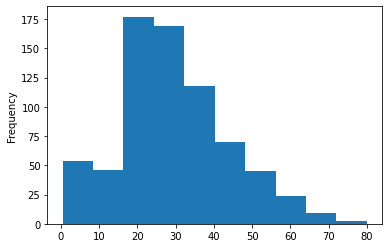

In [14]:
# Histogram of the ages of the passengers on board
titanic["Age"].plot.hist()


A large number of the passengers on the Titanic according to this plot were between the age of 20-40 years.

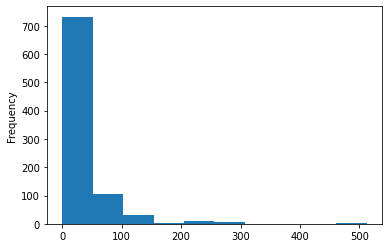

In [12]:
# Next we also check the Fare distribution among the paasengers
titanic["Fare"].plot.hist()

Most of the tickets are bought at a fare of less than 100 whom probably from the previous plots belonged to Third class and also between the age of 20-40 years

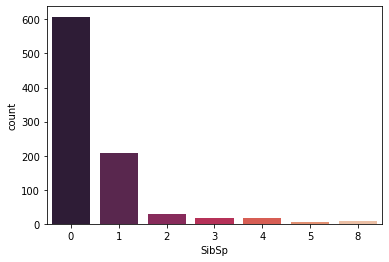

In [15]:
# Visualizing the distribution of sibling aboard the titanc
sns.countplot(x = "SibSp", data = titanic, palette = "rocket")

This shows that most of the people did not have any of their siblings travelling with them

In [16]:
# WRANGLING THE DATASET
# First we check the number of NaN values in the data
titanic.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Seems like the Variables Age, Cabin, and Embarked have some missing values. These can be visualized as shown below::

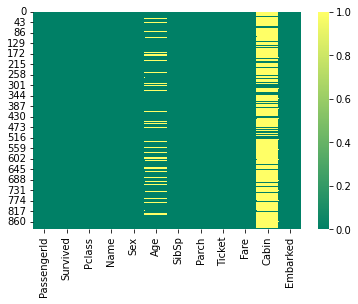

In [19]:
# We can plot a heatmap to show which of the variables has the most number of missing values
sns.heatmap(titanic.isnull(), cmap = "summer")

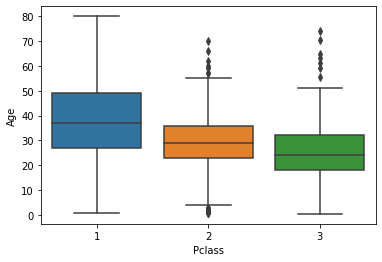

In [20]:
# Checking for outliers using a boxplot
sns.boxplot(x = "Pclass", y = "Age", data = titanic)

Passenger class three has quite a big number of outliers in terms of age

In [25]:
# Drop the Cabin column from our dataset since we won't be using it in our analysis
titanic.drop(columns = "Cabin", axis=1, inplace=True)


In [27]:
# Drop NaN values
titanic.dropna(inplace = True)

In [28]:
# One Hot Encoding to convert cateorical variables in the dataset to dummy variables
sex = pd.get_dummies(titanic["Sex"], drop_first =True)
sex.head()


,male
0,1
1,0
2,0
3,0
4,1


In [31]:
embarked = pd.get_dummies(titanic["Embarked"], drop_first = True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


The letters C,Q,S represent; Cherbough, Queenstown and Southampton respectively

In [33]:
Pcl = pd.get_dummies(titanic["Pclass"], drop_first = True)
Pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [35]:
# Bringing back our converted variables into the original dataset
titanic = pd.concat([titanic, sex, embarked,Pcl], axis = 1)
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1


In [37]:
# Deleting the columns which won't be useful in our analysis
titanic.drop(columns = ["Name", "Sex", "Ticket", "Embarked", "Pclass", "PassengerId"], axis = 1, inplace = True)

In [38]:
# checking the head our new dataset
titanic.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


Next we train a model upon the data by splitting the data into test data and train data and then applying logistic regression


In [55]:
# Splitting the data
X = titanic. drop(columns = "Survived", axis = 1)
y = titanic["Survived"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 6)
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()


In [57]:
# Fitting the model
lm.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [58]:
# Predictions using the fitted model
predictions = lm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [59]:
# Get a classification report of the model
from sklearn.metrics import classification_report
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.78      0.84      0.80       128\n           1       0.72      0.64      0.68        86\n\n    accuracy                           0.76       214\n   macro avg       0.75      0.74      0.74       214\nweighted avg       0.75      0.76      0.75       214\n'

In [60]:
# Get the confusion matrix from the model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[107,  21],
       [ 31,  55]])

In [61]:
# Check the accuracy score of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7570093457943925

The Model we built is 75.700093457943925% accurate. Thus the model can predict survival with accuracy of about 76%

In [ ]:
####JoshuaMaeba coding